In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
df = pd.read_csv('Data/matches.csv',index_col=0)
df.head()

# Data Visualization

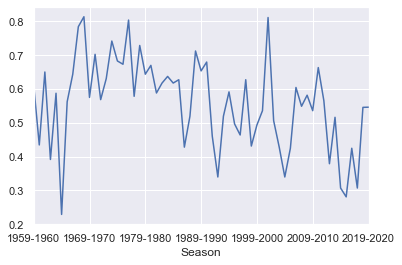

In [8]:
df.groupby('Season')['HomeAdvantage'].mean().plot()

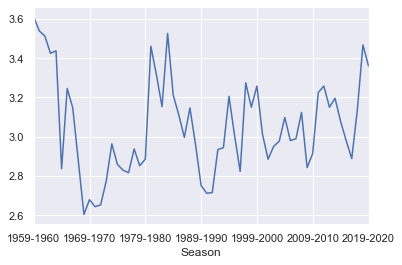

In [6]:
df.groupby('Season')['GoalsScored'].mean().plot()

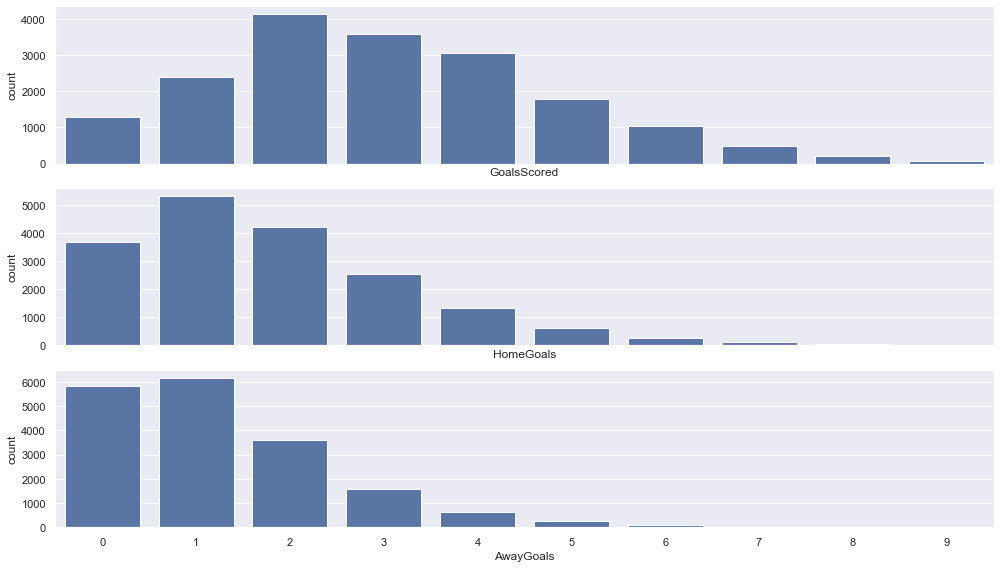

In [16]:
f,axes = plt.subplots(nrows=3,figsize=(14,8),sharex=True)
sns.countplot(df['GoalsScored'],ax=axes[0],color='b')
sns.countplot(x="HomeGoals",data=df,ax=axes[1],color='b')
sns.countplot(x="AwayGoals",data=df,ax=axes[2],color='b')
plt.tight_layout()
plt.show()